In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import itertools

In [228]:
p_info = pd.read_csv('participants_data.csv')

In [233]:
summary = pd.DataFrame()
for pid in p_info['pid']:
    data = pd.read_csv('result/' + pid + '_MR.csv', index_col=0)
    data.insert(0, 'pid', pid)
    summary = summary.append(data, ignore_index=True)

Text(0.5, 1.0, 'RT-compared by condition')

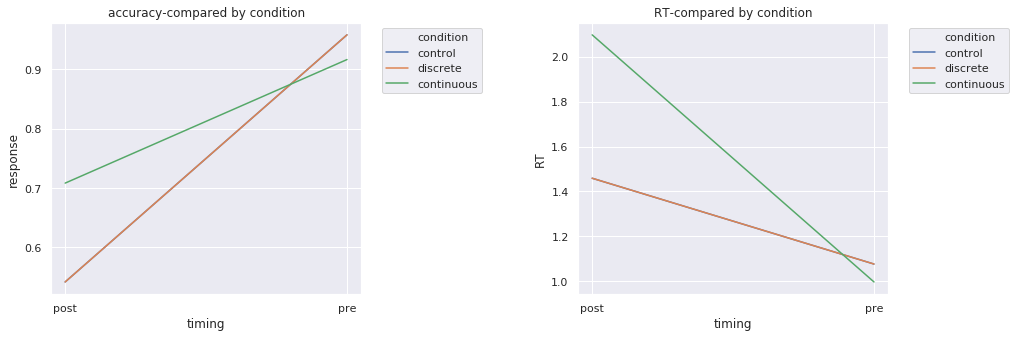

In [236]:
#groupby condition
plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
data = summary.groupby(['pid', 'condition', 'timing'], as_index=False).mean()
plt.subplot(1, 2, 1)
sns.lineplot(x='timing', y='response', hue='condition', err_style='bars', data=data)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('accuracy-compared by condition')
plt.subplot(1, 2, 2)
sns.lineplot(x='timing', y='RT', hue='condition', err_style='bars', data=data)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('RT-compared by condition')

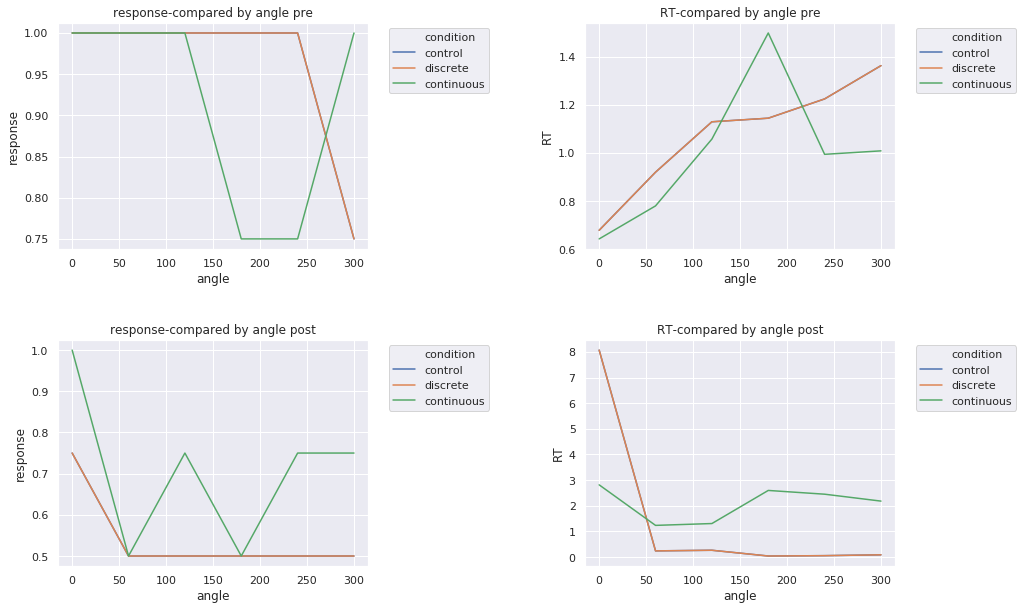

In [251]:
#groupby angle
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.7, hspace=0.4)
data = summary.groupby(['pid', 'condition', 'timing', 'angle'], as_index=False).mean()
for i, (timing, value) in enumerate(itertools.product(['pre', 'post'], ['response', 'RT'])):
    plt.subplot(2, 2, i+1)
    sns.lineplot(x='angle', y=value, hue='condition', err_style='bars', data=data[data.timing == timing])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title(value + '-compared by angle ' + timing)

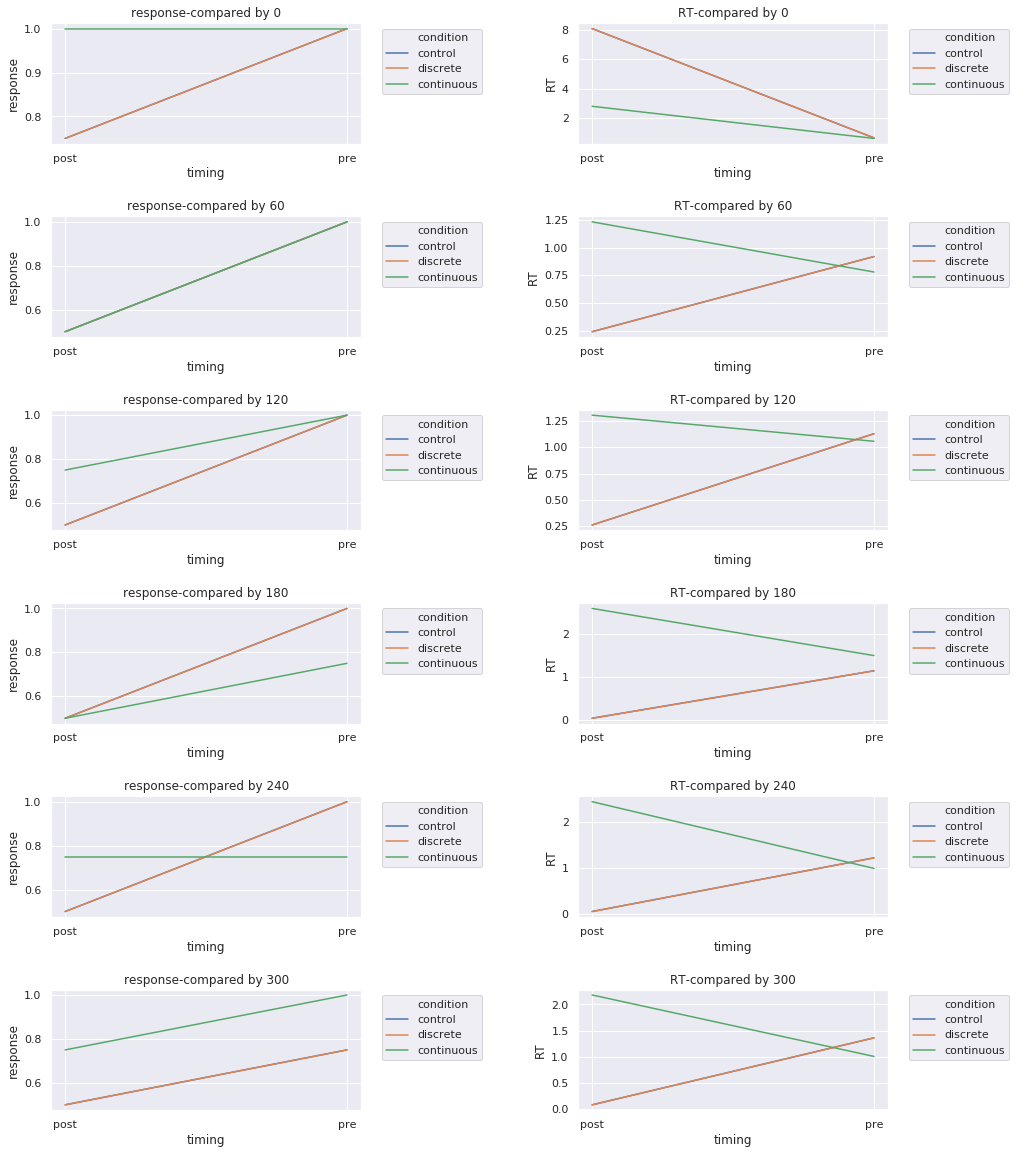

In [258]:
#compared by angle
plt.figure(figsize=(15, 20))
plt.subplots_adjust(wspace=0.7, hspace=0.6)
data = summary.groupby(['pid', 'condition', 'timing', 'angle'], as_index=False).mean()
for i, (angle, value) in enumerate(itertools.product(range(0,301,60), ['response', 'RT'])):
    plt.subplot(6, 2, i+1)
    sns.lineplot(x='timing', y=value, hue='condition', err_style='bars', data=data[data.angle == angle])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title(value + '-compared by ' + str(angle))

In [244]:
list(enumerate(itertools.product(['response', 'accuracy'], range(0,301,60))))

[(0, ('response', 0)),
 (1, ('response', 60)),
 (2, ('response', 120)),
 (3, ('response', 180)),
 (4, ('response', 240)),
 (5, ('response', 300)),
 (6, ('accuracy', 0)),
 (7, ('accuracy', 60)),
 (8, ('accuracy', 120)),
 (9, ('accuracy', 180)),
 (10, ('accuracy', 240)),
 (11, ('accuracy', 300))]

In [52]:
data.groupby('timing').agg({'response':'mean', 'RT':'median'})['response']

timing
post    0.541667
pre     0.958333
Name: response, dtype: float64

In [223]:
data = pd.read_csv('result/sha1_MR.csv', index_col=0)

In [225]:
data = data.groupby(['condition', 'timing', 'hand', 'face', 'angle'], as_index=False).mean()

In [226]:
data

,condition,timing,hand,face,angle,view,response,RT
0,control,post,left,back,0,0,True,0.036047
1,control,post,left,back,60,0,True,0.132617
2,control,post,left,back,120,0,True,0.061086
3,control,post,left,back,180,0,True,0.063498
4,control,post,left,back,240,0,True,0.049207
5,control,post,left,back,300,0,True,0.038802
6,control,post,left,palm,0,0,True,0.124159
7,control,post,left,palm,60,0,True,0.716944
8,control,post,left,palm,120,0,True,0.134137
9,control,post,left,palm,180,0,True,0.004198


In [178]:
test = data.groupby(['pid', 'condition', 'timing', 'angle'], as_index=False).mean()

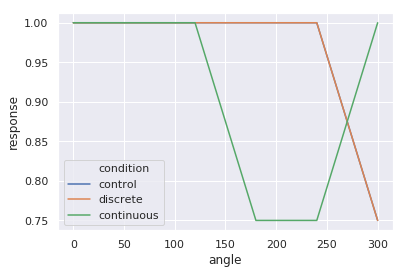

In [181]:
sns.lineplot(x='angle', y='response', hue='condition', err_style='bars', data=test[test.timing == 'pre'])

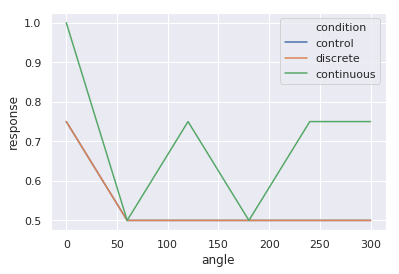

In [182]:
sns.lineplot(x='angle', y='response', hue='condition', err_style='bars', data=test[test.timing == 'post'])

In [219]:
data =

,pid,condition,timing,angle,view,response,RT
0,sha1,control,post,0,0,0.75,8.072129
1,sha1,control,post,60,0,0.50,0.239448
2,sha1,control,post,120,0,0.50,0.263570
3,sha1,control,post,180,0,0.50,0.039352
4,sha1,control,post,240,0,0.50,0.053104
5,sha1,control,post,300,0,0.50,0.085719
6,sha1,control,pre,0,0,1.00,0.678600
7,sha1,control,pre,60,0,1.00,0.920144
8,sha1,control,pre,120,0,1.00,1.129678
9,sha1,control,pre,180,0,1.00,1.144602


In [264]:
test = pd.DataFrame(
    list(itertools.product(range(2), 
                           ('left', 'right'))))

In [265]:
test

,0,1
0,0,left
1,0,right
2,1,left
3,1,right
